# Python Histograms, Box Plots, & Distributions

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-oriented-with-the-data" data-toc-modified-id="Getting-oriented-with-the-data-1">Getting oriented with the data</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-2">Distributions</a></span></li><li><span><a href="#Proportion-of-flights-delayed" data-toc-modified-id="Proportion-of-flights-delayed-3">Proportion of flights delayed</a></span></li><li><span><a href="#Basic-statistics:-mean,-median,-percentiles" data-toc-modified-id="Basic-statistics:-mean,-median,-percentiles-4">Basic statistics: mean, median, percentiles</a></span><ul class="toc-item"><li><span><a href="#Practice-Problem" data-toc-modified-id="Practice-Problem-4.1">Practice Problem</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5">Histograms</a></span><ul class="toc-item"><li><span><a href="#Practice-Problem" data-toc-modified-id="Practice-Problem-5.1">Practice Problem</a></span></li></ul></li><li><span><a href="#Comparing-distributions-with-histograms" data-toc-modified-id="Comparing-distributions-with-histograms-6">Comparing distributions with histograms</a></span></li><li><span><a href="#Standard-deviation" data-toc-modified-id="Standard-deviation-7">Standard deviation</a></span><ul class="toc-item"><li><span><a href="#Where-not-to-vacation-in-the-middle-of-January" data-toc-modified-id="Where-not-to-vacation-in-the-middle-of-January-7.1">Where not to vacation in the middle of January</a></span></li><li><span><a href="#Filtering-a-list-of-values-with-.isin()" data-toc-modified-id="Filtering-a-list-of-values-with-.isin()-7.2">Filtering a list of values with <code>.isin()</code></a></span></li></ul></li><li><span><a href="#Box-Plots" data-toc-modified-id="Box-Plots-8">Box Plots</a></span><ul class="toc-item"><li><span><a href="#Practice-Problem" data-toc-modified-id="Practice-Problem-8.1">Practice Problem</a></span></li></ul></li></ul></div>

In this lesson, you'll use records of United States domestic flights from the US Department of Transportation. It includes a record of each flight that took place from January 1-15 of 2015.

Column Name | Description
:-----------|:-----------
FlightDate | Flight Date (yyyymmdd)
UniqueCarrier | Unique Carrier Code
FlightNum | Flight Number (Flights on different days may have the same flight number)
Origin | Origin Airport
Dest | Destination Airport
DepDelay | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
ArrDelay | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
Cancelled | Cancelled Flight Indicator (1=Yes)
CarrierDelay | Carrier Delay, in Minutes
WeatherDelay | Weather Delay, in Minutes
NASDelay | National Air System Delay, in Minutes
SecurityDelay | Security Delay, in Minutes
LateAircraftDelay | Late Aircraft Delay, in Minutes

**Carrier Codes**

Code | Carrier
:----|:-------
AA | American Airlines Inc.
OO | SkyWest Airlines Inc.
DL | Delta Air Lines Inc.
NK | Spirit Air Lines
HA | Hawaiian Airlines Inc.
WN | Southwest Airlines Co.
B6 | JetBlue Airways
US | US Airways Inc.
AS | Alaska Airlines Inc.
MQ | Envoy Air
F9 | Frontier Airlines Inc.
VX | Virgin America
EV | ExpressJet Airlines Inc.
UA | United Air Lines Inc.

### Getting oriented with the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Assign the dataset to the data variable
data = pd.read_csv('/users/bm/downloads/courses/python-for-data-analysis/us_flights.csv')

# Replace missing values
data = data.fillna(np.nan)

data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0


### Distributions

What are the day-to-day trends of air travel delays? Which airlines are doing better at getting you to your destination on time and which airports are the worst to fly out of?

Before looking at the distribution of delays across airlines, start by exploring which airlines have the most delays.

In [4]:
# First, build a series indicating whether or not flights are delayed

data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)
data['delayed'].head()

0    False
1    False
2    False
3    False
4     True
Name: delayed, dtype: bool

In [5]:
# Count the number of delayed flights for each airline

delayed_flights = data[data['delayed'] == True] # filter to only rows where delayed == True

delayed_flights['unique_carrier'].value_counts() # count the number of rows for each carrier

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

### Proportion of flights delayed

Complete these 4 steps to calculate the proportion of flights that were delayed:

**1. Group by carrier and delayed**

In [6]:
data.groupby(['unique_carrier', 'delayed']).size().unstack()

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [7]:
# Use .reset_index() to clean up the index and assign the new DataFrame to a variable

delayed_by_carrier = data.groupby(['unique_carrier', 'delayed']).size().unstack().reset_index()

delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


**2. Create total flight count column**

In [8]:
# Create a derived column that sums delayed and on-time flights for each carrier

delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])

delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flights_count
0,AA,8912,9841,18753
1,AS,3527,2104,5631
2,B6,4832,4401,9233
3,DL,17719,9803,27522
4,EV,10596,11371,21967


**3. Calculate the proportion of total flights delayed**

In [9]:
# Store the proportion delayed in another derived column

delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']

delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flights_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188
4,EV,10596,11371,21967,0.517640


**4. Sort by the proportion of flights delayed**

In [10]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flights_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


### Basic statistics: mean, median, percentiles

It's plausible that the proportion of flight delays may be lower for some airlines, but the length of those delays may be much longer.

Passengers care more about longer flight delays than shorter ones, and they might choose a different airline given a record of long delays.

**How many minute are flights delayed on average, for each airline?**

**Mean**

`.pivot_table()` calculates the mean of the aggregated values by default. Pivot on the column `unique_carrier` to see the mean delay time aggregated by airline:
```python
data.pivot_table(columns='unique_carrier', values='arr_delay', aggfunc=np.mean).sort_values(ascending=False)
```
Since `.pivot_table` calculates `mean` by default, the above may be shortened as follows and produce the same results:

In [11]:
data.pivot_table(columns='unique_carrier', values='arr_delay')

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
arr_delay,15.616299,1.731951,13.576129,4.118949,18.35852,28.836953,6.458937,35.627406,22.77967,19.031663,16.094772,7.671557,3.833908,11.273536


**Basic statistics with `.describe()`**

Use `.describe()` to see a number of basic statistics about a numeric column. This can give a quick overview of the shape of the data.

**Example:**

In [12]:
# select the arr_delay series for all Southwest flights:

southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest.head()

62030    18.0
62031    11.0
62032     9.0
62033    44.0
62034    42.0
Name: arr_delay, dtype: float64

* `data['unique_carrier'] == 'WN'` creates a **boolean index** that returns `True` for rows that represent Southwest flights

* Wrapping that in `data[...]` applies the boolean index to the DataFrame `data`

* `['arr-delay']` reduces the columns to just the ['arr_delay'] column (and the index)


In [13]:
# run .describe() on this new object to get basic statistics:

southwest.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

#### Practice Problem

> Get the basic statistics for arrival delays for flights 
> originating in Chicago. Use the `.describe()` method.

In [14]:
origin_chicago = data[data['origin'] == 'ORD']['arr_delay']
origin_chicago.head()

750    -15.0
751      5.0
752      NaN
753     22.0
754    176.0
Name: arr_delay, dtype: float64

In [15]:
origin_chicago.describe()

count    9207.000000
mean       38.073205
std        63.261760
min       -49.000000
25%        -3.000000
50%        17.000000
75%        57.000000
max       751.000000
Name: arr_delay, dtype: float64

### Histograms

You can visually represent the distribution of flight delays using a **histogram**. Histograms allow you to bucket the values into **bins**, or fixed value ranges, and count how many values fall in that bin.

You can use the numpy method `.arange()` to create a list of numbers that define bins of ten minute intervals. The bins of ten minute intervals will range from 50 minutes early (-50) to 200 minutes late (200). The first bin will hold a count of flights that arrived between 50 and 40 minutes early, then 40 and 30 minutes, and so on.

In [16]:
bin_values = np.arange(start=-50, stop=200, step=10)
print(bin_values)

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


Plot the distribution of Southwest flight delays as a histogram using the bin_values variable created above:

wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

The above shows the vast majority of Southwest flights weren't more than 30 minutes late.

#### Practice Problem

> Plot Virgin America's flight delays at five-minute intervals 
> from -50 minutes to 200 minutes.

In [17]:
# create the required bin values:

bin_values = np.arange(start=-50, stop=200, step=5)
print(bin_values)

[-50 -45 -40 -35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35
  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125
 130 135 140 145 150 155 160 165 170 175 180 185 190 195]


<AxesSubplot:>

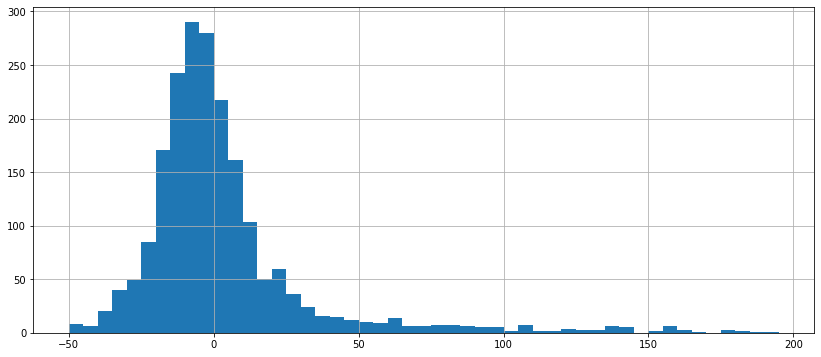

In [18]:
vx_carrier = data[data['unique_carrier'] == 'VX']
vx_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

**Result:** The trend is a bell curve with the exception of an increase in the number of delays between 20-25 minutes.

### Comparing distributions with histograms

Compare the distribution of two airlines with a similar number of total flights, US Airways and Envoy Air:

unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

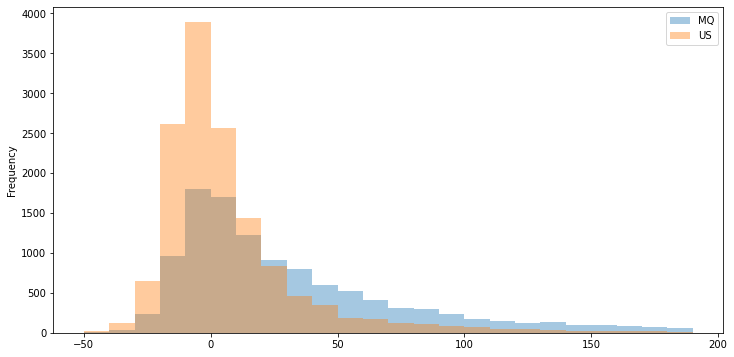

In [19]:
bin_values = np.arange(start=-50, stop=200, step=10)

# create an index of flights from the two airlines:
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ'])

# select rows
us_mq_airlines = data[us_mq_airlines_index]

# group values by carrier, select minutes delayed
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay']

# alpha for transparency
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=0.4, legend=True)

The two distributions look similar, but not the same (the third color is where they overlap).

In [20]:
# key statistics about the carriers:
group_carriers.describe()

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0


The delays on Envoy Airlines are more distributed than delays on US Airways, meaning that the values are more spread out.

### Standard deviation

The standard deviation measure is based on the statistical concept of **normal distribution.** 

For a normal distribution:
* 34.1% of records fall between the mean and one standard deviation **higher**
* 34.1% of records fall between the mean and one standard deviation **lower**
* In other words, 68.2% of data falls within one standard deviation of the mean

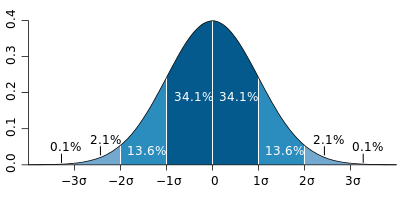

Envoy Air has a mean of about 35 minutes and a standard deviation of about 58 minutes. This means that 62.8% of the Envoy Air flights are between 23 minutes early (35 - 58 = -23) and 93 minutes late (35 + 58 = 93).

US Airways has a lower mean, indicating that its flights, on average, are less delayed. US Airways also has a lower standard deviation, meaning delays are typically closer to the mean. More specifically, 62.8% of US Airways flights fall between 27 minutes early (7 - 34 = -27) and 41 minutes late (7 + 34 = 41).

In other words, US Airways delays have lower **dispersion** than Envoy Air.

#### Where not to vacation in the middle of January

Next, we look at another very real dimension of this data: flight delays segmented by airport.

In [21]:
# 20 highest volume airports by origin:

hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

In [22]:
hi_volume_airports_names = hi_volume.index.tolist()
print(hi_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


#### Filtering a list of values with `.isin()`

In [24]:
# create a boolean index filtering for the records that 
# originated ('origin') in the 20 highest volume airports.

hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True


### Box Plots

We now use the above DataFrame of flights originating from high volume airports to answer the question: Where did the longest flight delays originate in January 2015?

Create a pivot table that pivots the flight date on the airport, where the values are the mean of the flight delays for that day: 

In [25]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


In [26]:
# use `describe()` to see the mean and dispersion for each airport

hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


A one-dimensional way of visualizing the shape of distributions called a **box plot** is used to compare many distributions at once.

Box plots are composed of the same key measures of dispersion that we get when we run `.describe()`, allowing it to be displayed in one dimension and easily comparable with other distributions. The components of a box plot are:

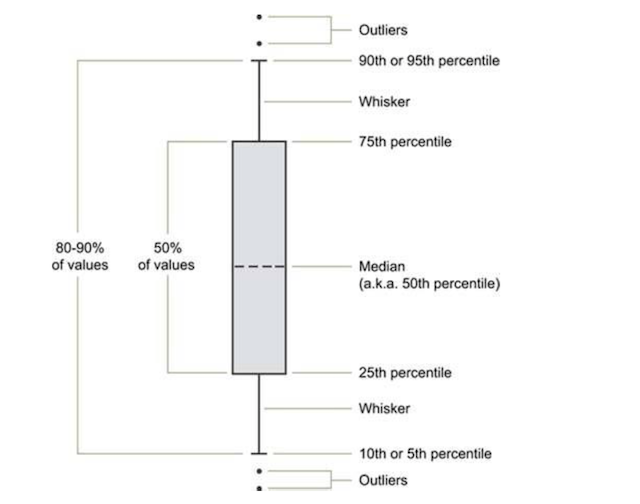
<figcaption>— Information Dashboard Design, Stephen Few</figcaption>

<AxesSubplot:>

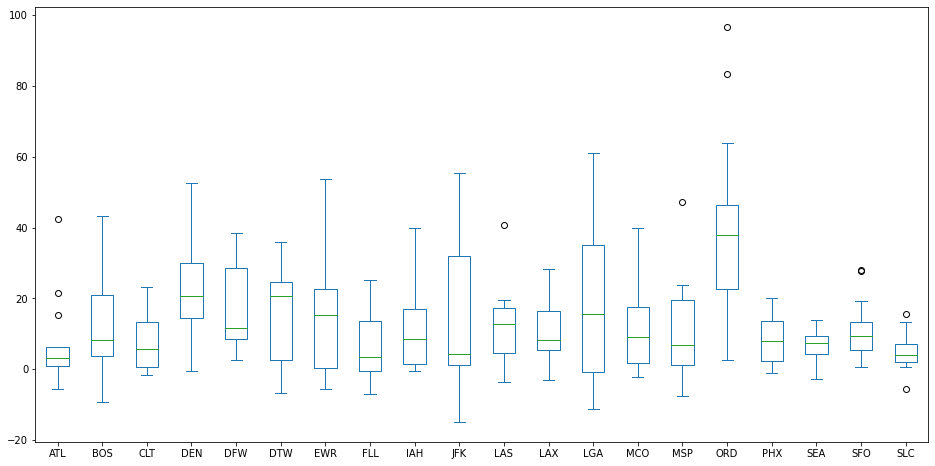

In [27]:
# use box plots to compare day-to-day distribution of delays at each airport:

hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

Airports like JFK had significant dispersion of delays, while LGA was evenly distributed around the most frequent average delay. ORD, however, was almost twice as delayed all the time, compared to every other high volume airport.

To answer the question, **Which airports are the worst to fly out of?**, you can now say that you will (almost certainly) be delayed if you are flying out of Chicago in January, based on 2015 data. 

#### Practice Problem

Visualize the average arrival delay by date and carrier using box plots.

In [31]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay')
hi_volume_airports_pivots

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,22.793555,9.558333,0.129103,-0.575700,6.666291,16.322581,42.923077,21.733193,12.995238,15.094218,11.387793,1.233645,2.703448,14.254252
2015-01-03 00:00:00,32.054780,10.793722,26.047170,11.867751,36.481657,56.472727,23.615385,42.895522,32.403846,30.532646,27.891620,13.267372,2.000000,28.900452
2015-01-04 00:00:00,40.382204,13.795652,41.449561,16.553435,41.884346,65.884354,2.714286,77.383863,39.961722,36.008801,36.304712,19.183646,17.394366,31.801056
2015-01-05 00:00:00,28.475127,7.591549,24.427617,-0.100584,28.714123,31.209459,69.230769,64.924939,52.177885,26.962796,17.430451,6.453315,1.598592,16.726569
2015-01-06 00:00:00,13.532151,-0.780488,35.677033,11.038787,21.896424,18.516129,6.083333,44.416476,32.941463,16.594221,18.507202,22.777958,4.682927,23.281891
2015-01-07 00:00:00,12.578610,1.478261,17.151807,0.048764,14.821687,34.354610,10.461538,43.095133,25.851675,18.677379,23.179622,6.629630,1.297521,8.368984
2015-01-08 00:00:00,18.745493,3.350230,2.556818,7.291098,22.666667,24.661972,27.750000,46.623978,19.239234,23.705290,26.590264,6.940860,-1.805970,6.696214
2015-01-09 00:00:00,13.492521,-0.547511,30.454128,7.233749,20.004667,28.830986,10.692308,36.805226,20.759434,23.295238,25.571000,3.998643,1.306569,1.575181
2015-01-10 00:00:00,6.483010,-8.014706,1.300261,-6.277982,0.561497,19.142857,-13.500000,13.313609,10.197183,8.961424,3.951684,-1.442761,-6.075269,-0.529538


<AxesSubplot:>

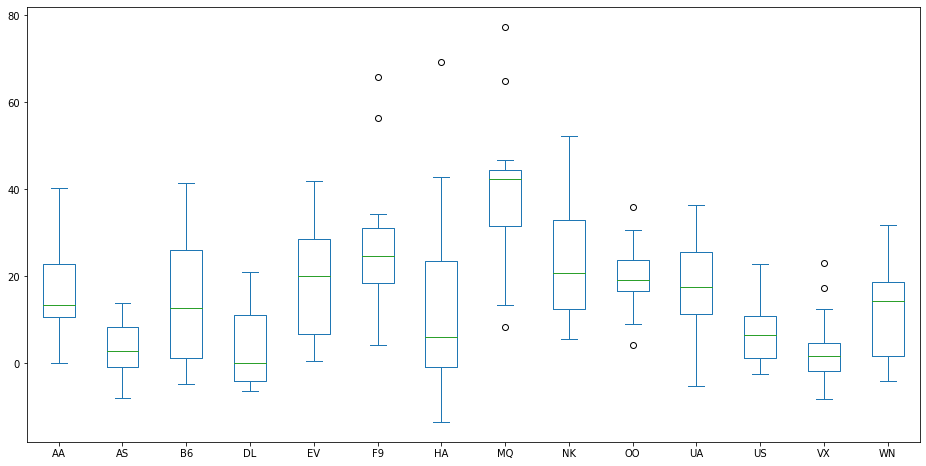

In [30]:
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

Out of all airlines, Envoy Air (MQ) had the highest consistent delays at high-volume airports.